In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from py_lab.daca import DACA

In [3]:
daca = DACA(name="U6")
daca.Open(AIN=[2], AIN_ref=0)

In [16]:
daca.Get_Signal(is_background=True, rest_background=False, verbose=True)

Reference:  4.018549599055
Signal:  6.144475158570001


6.144475158570001

In [6]:
for ind in range(4):
    print(daca._object.getAIN(ind))

10.109889201523673
8.511805863719454
-0.02593678494140625
2.8956663733914847


In [10]:
help(daca._object.getAIN)

Help on method getAIN in module u6:

getAIN(positiveChannel, resolutionIndex=0, gainIndex=0, settlingFactor=0, differential=False) method of u6.U6 instance
    Name: U6.getAIN(positiveChannel, resolutionIndex = 0, gainIndex = 0,
                    settlingFactor = 0, differential = False)
    Args: positiveChannel, the positive channel to read from
          resolutionIndex, the resolution index.  0 = default, 1-8 = high-speed
                           ADC, 9-12 = high-res ADC (U6-Pro only).
          gainIndex, the gain index.  0=x1, 1=x10, 2=x100, 3=x1000,
                     15=autorange.
          settlingFactor, the settling factor.  0=Auto, 1=20us, 2=50us,
                          3=100us, 4=200us, 5=500us, 6=1ms, 7=2ms, 8=5ms, 
                          9=10ms.
          differential, set to True for differential reading.  Negative
                        channel is positiveChannel+1.
    Desc: Reads an AIN and applies the calibration constants to it.
    
    >>> myU6.getAI

In [1]:
from py_pol.mueller import Mueller
from py_pol.stokes import Stokes
import numpy as np
degrees = np.pi / 180

In [6]:
M = Mueller().diattenuator_perfect()
print(M.rotate(angle=np.linspace(0, 180, 9)))

M M00 = [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  M01 = [ 0.5         0.26266099 -0.22403681 -0.49804392 -0.29923003  0.18365968
  0.49219098  0.3334578  -0.14184555]
  M02 = [ 0.          0.42545176  0.44699833  0.04418434 -0.40057632 -0.46504744
 -0.08802297  0.37256663  0.47945786]
  M03 = [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  M10 = [ 0.5         0.26266099 -0.22403681 -0.49804392 -0.29923003  0.18365968
  0.49219098  0.3334578  -0.14184555]
  M11 = [0.5        0.1379816  0.10038498 0.49609549 0.17907723 0.06746176
 0.48450391 0.22238821 0.04024032]
  M12 = [ 0.          0.22349917 -0.20028816 -0.04401149  0.23972893 -0.17082093
 -0.08664823  0.2484705  -0.13601792]
  M13 = [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  M20 = [ 0.          0.42545176  0.44699833  0.04418434 -0.40057632 -0.46504744
 -0.08802297  0.37256663  0.47945786]
  M21 = [ 0.          0.22349917 -0.20028816 -0.04401149  0.23972893 -0.17082093
 -0.08664823  0.2484705  -0.13601792]
  M22 = [0.         0.3620184  0.39961502 0.00390451 0.3

In [73]:
x = np.linspace(0, 1, 3)
y = np.linspace(0, 1, 5)
X, Y = np.meshgrid(x,y)
print(X.shape)
print(X[4, 1])
print(x, X, sep='\n')

(5, 3)
0.5
[0.  0.5 1. ]
[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]


The intensity of M * M * S is (a.u.):
The mean value is 0.5 +- 0.353547994602788


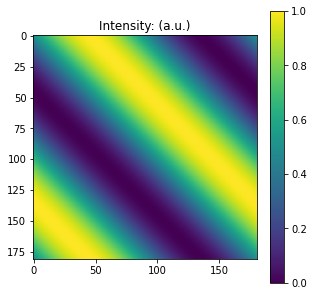


The intensity of M * M * S is (a.u.):
The mean value is 0.5 +- 0.353547994602788


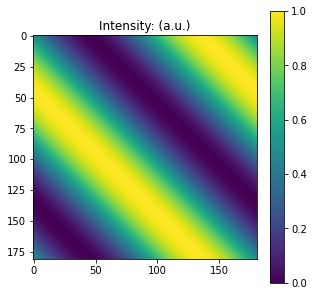


The intensity of M * M * S is (a.u.):
The mean value is 0.5 +- 0.35354799460278796


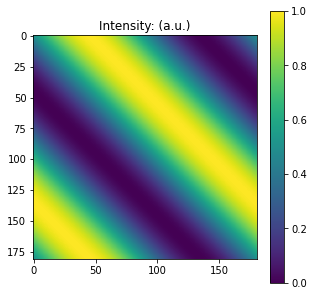

9.725677050064824e-17

In [18]:
x = np.linspace(0, 180*degrees, 181)
X, Y = np.meshgrid(x,x)
S = Stokes().circular_light(kind='r')
Mp1 = Mueller().diattenuator_perfect(azimuth=X)
Mr1 = Mueller().quarter_waveplate(azimuth=Y)
Sf = Mp1 * Mr1 * S
I1 = Sf.parameters.intensity(draw=True)

S = Stokes().circular_light(kind='l')
Sf = Mp1 * Mr1 * S
I2 = Sf.parameters.intensity(draw=True)


Mr1 = Mueller().quarter_waveplate(azimuth=Y+90*degrees)
Sf = Mp1 * Mr1 * S
I3 = Sf.parameters.intensity(draw=True)

np.mean(np.abs(I3-I1))

The intensity of M * M * M * S is (a.u.):
The mean value is 0.5000000000000001 +- 0.24896384893590834


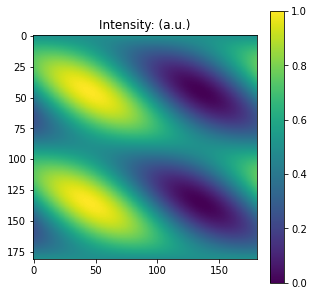


The intensity of M * M * M * S is (a.u.):
The mean value is 0.49999999999999994 +- 0.24896384893590834


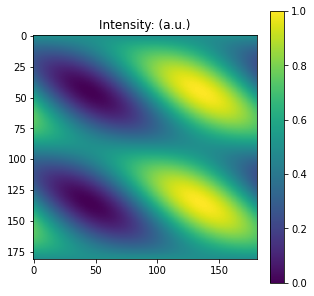


The intensity of M * M * M * S is (a.u.):
The mean value is 0.5 +- 0.2489638489359083


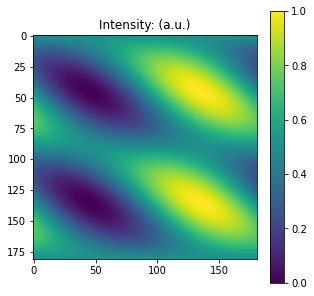

0.4024856176911993

In [19]:
x = np.linspace(0, 180*degrees, 181)
X, Y = np.meshgrid(x,x)
S = Stokes().circular_light(kind='r')
Mp1 = Mueller().diattenuator_perfect(azimuth=X)
Mr1 = Mueller().quarter_waveplate(azimuth=Y)
Mrc = Mueller().quarter_waveplate(azimuth=0)
Sf = Mp1 * Mr1 * Mrc * S
I1 = Sf.parameters.intensity(draw=True)

S = Stokes().circular_light(kind='l')
Sf = Mp1 * Mr1 * Mrc * S
I2 = Sf.parameters.intensity(draw=True)


Mr1 = Mueller().quarter_waveplate(azimuth=Y+90*degrees)
Sf = Mp1 * Mr1 * Mrc * S
I3 = Sf.parameters.intensity(draw=True)

np.mean(np.abs(I3-I1))

In [13]:
I = np.zeros((5,5))
for ind1 in range(5):
    for ind2 in range(5):
        I[ind1, ind2] = ind1
print(I)

[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


The intensity of M * M * M * S is (a.u.):
The mean value is 0.25092932002151425 +- 0.132689123904411


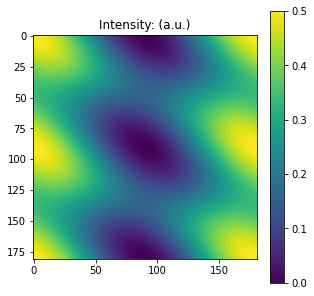


The intensity of M * M * S is (a.u.):
The mean value is 0.5 +- 0.3313124744387404


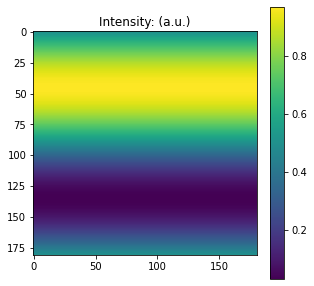

In [15]:
x = np.linspace(0, 180*degrees, 181)
X, Y = np.meshgrid(x,x)
S = Stokes().circular_light(kind='r')
Mp1 = Mueller().diattenuator_perfect(azimuth=0)
Mp2 = Mueller().diattenuator_perfect(azimuth=X)
Mr1 = Mueller().retarder_linear(azimuth=Y, R=70*degrees)
Sf = Mp2 * Mr1 * Mp1 * S
I1 = Sf.parameters.intensity(draw=True)

S = Stokes().circular_light(kind='l')
Sf = Mp1 * Mr1 * S
I2 = Sf.parameters.intensity(draw=True)

The intensity of M * M * M * S is (a.u.):
The mean value is 0.290780628818072 +- 0.17344446876155417


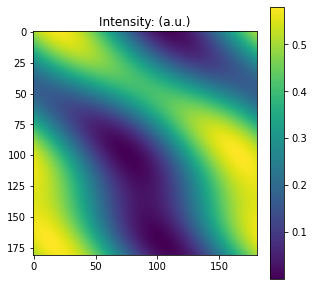

In [20]:
x = np.linspace(0, 180*degrees, 181)
X, Y = np.meshgrid(x,x)
S = Stokes().circular_light(kind='r')
Mp1 = Mueller().diattenuator_linear(p1=1, p2=0.4, azimuth=0)
Mp2 = Mueller().diattenuator_perfect(azimuth=X)
Mr1 = Mueller().retarder_linear(azimuth=Y, R=70*degrees)
Sf = Mp2 * Mr1 * Mp1 * S
I1 = Sf.parameters.intensity(draw=True)


The intensity of M @ 90.00 deg * M * M * S is (a.u.):
The mean value is 0.18441988950276247 +- 0.1594745184515285


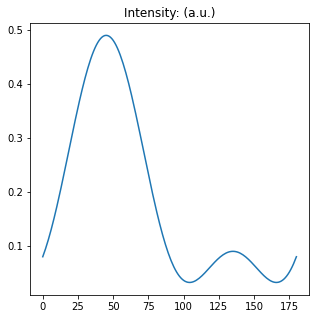

In [48]:
angle0 = 90*degrees
S = Stokes().circular_light(kind='l')
Mp1 = Mueller().diattenuator_linear(p1=1, p2=0.4, azimuth=0)
Mp2 = Mueller().diattenuator_linear(p1=1, p2=0, azimuth=90*degrees)
Mr1 = Mueller().retarder_linear(azimuth=x+angle0, R=90*degrees)
Sf = Mp2 * Mr1 * Mp1 * S
I1 = Sf.parameters.intensity(draw=True)

The intensity of M @ 90.00 deg * M * M @ 45.00 deg * M * S is (a.u.):
The mean value is 0.28644493275757044 +- 0.2044482864403454


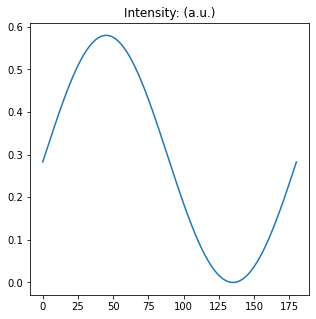

In [55]:
S = Stokes().circular_light(kind='r')
Mp1 = Mueller().diattenuator_linear(p1=1, p2=0.4, azimuth=0)
Mp2 = Mueller().diattenuator_linear(p1=1, p2=0, azimuth=90*degrees)
Mr1 = Mueller().retarder_linear(azimuth=x, R=90*degrees)
Mr2 = Mueller().retarder_linear(azimuth=45*degrees, R=45*degrees)
Sf = Mp2 * Mr1 * Mr2 * Mp1 * S
I1 = Sf.parameters.intensity(draw=True)

M * S = 
[+1.000]   
[+0.000]   
[+0.707]   
[+0.707]   

The intensity of M * M * S is (a.u.):
The mean value is 0.5 +- 0.24930843574295017


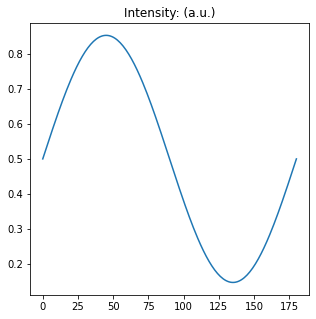

array([0.5       , 0.51233884, 0.52466264, 0.53695639, 0.54920512,
       0.5613939 , 0.57350788, 0.58553231, 0.59745252, 0.60925401,
       0.62092238, 0.63244343, 0.64380312, 0.65498761, 0.66598326,
       0.6767767 , 0.68735475, 0.69770455, 0.70781347, 0.7176692 ,
       0.72725974, 0.73657339, 0.74559882, 0.75432503, 0.76274137,
       0.77083761, 0.77860387, 0.7860307 , 0.79310904, 0.79983028,
       0.80618622, 0.81216912, 0.81777168, 0.82298709, 0.827809  ,
       0.83223151, 0.83624926, 0.83985733, 0.84305134, 0.8458274 ,
       0.84818212, 0.85011263, 0.85161659, 0.85269215, 0.85333802,
       0.85355339, 0.85333802, 0.85269215, 0.85161659, 0.85011263,
       0.84818212, 0.8458274 , 0.84305134, 0.83985733, 0.83624926,
       0.83223151, 0.827809  , 0.82298709, 0.81777168, 0.81216912,
       0.80618622, 0.79983028, 0.79310904, 0.7860307 , 0.77860387,
       0.77083761, 0.76274137, 0.75432503, 0.74559882, 0.73657339,
       0.72725974, 0.7176692 , 0.70781347, 0.69770455, 0.68735

In [67]:
S = Stokes().circular_light(kind='r')
Mp1 = Mueller().diattenuator_linear(p1=1, p2=0, azimuth=x)
Mr1 = Mueller().retarder_linear(azimuth=0, R=45*degrees)
print(Mr1 * S)
Sf = Mp1 * Mr1 * S
Sf.parameters.intensity(draw=True)

The intensity of M * M * M * S is (a.u.):
The mean value is 0.3743093922651934 +- 0.08862948744284849


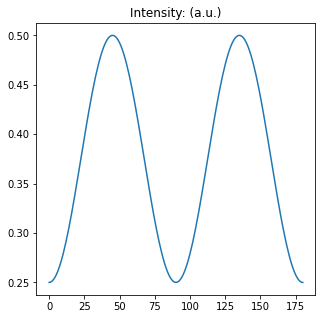

In [11]:
x = np.linspace(0, 180*degrees, 181)
angle0 = 135*degrees
S = Stokes().circular_light(kind='l')
Mp1 = Mueller().diattenuator_linear(p1=1, p2=0, azimuth=0)
Mp2 = Mueller().diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
Mr1 = Mueller().retarder_linear(azimuth=x+angle0, R=90*degrees)
Sf = Mp2 * Mr1 * Mp1 * S
I1 = Sf.parameters.intensity(draw=True)

In [4]:
anglesR = np.random.rand(2) * 180*degrees
angles = np.linspace(0, 180*degrees, 181)
S = Stokes().circular_light()
Mp1 = Mueller().diattenuator_perfect(azimuth=anglesR[0])
Mr1 = Mueller().quarter_waveplate(azimuth=angles)
Mrc = Mueller().quarter_waveplate(azimuth=45*degrees)
Mp2 = Mueller().diattenuator_perfect(azimuth=anglesR[1])

Sf = Mp2 * Mr1 * Mrc * Mp2 * S
Icon = Sf.parameters.intensity()
Sf = Mp2 * Mr1 * Mp2 * S
Isin = Sf.parameters.intensity()

Mp2 = Mueller().diattenuator_perfect(azimuth=45*degrees)

Sf = Mp2 * Mr1 * Mrc * Mp2 * S
Icon2 = Sf.parameters.intensity()
Sf = Mp2 * Mr1 * Mp2 * S
Isin2 = Sf.parameters.intensity()

In [5]:
import matplotlib.pyplot as plt

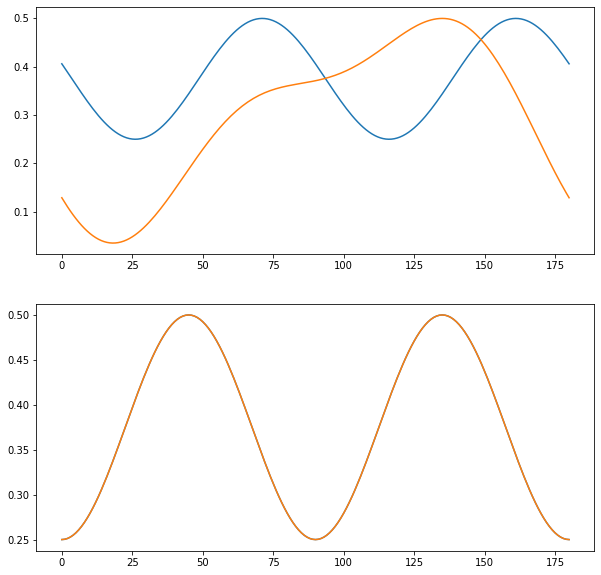

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(angles/degrees, Isin)
plt.plot(angles/degrees, Icon)
plt.subplot(2,1,2)
plt.plot(angles/degrees, Isin2)
plt.plot(angles/degrees, Icon2)

The intensity of M * M * M * S is (a.u.):
The mean value is 0.25069442324715363 +- 0.1255178160071116


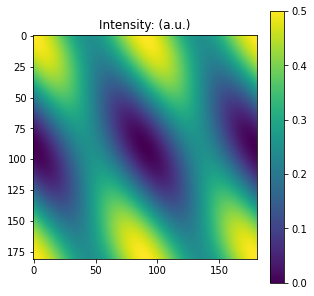


The intensity of M * M * M @ 22.50 deg * M * S is (a.u.):
The mean value is 0.2503472116235768 +- 0.1530919363473033


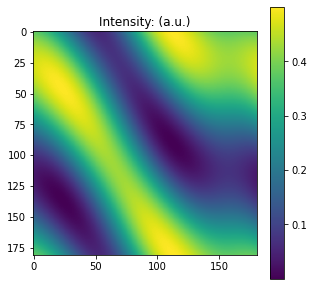

In [11]:
anglesX, anglesY = np.meshgrid(angles, angles)

S = Stokes().circular_light()
Mp1 = Mueller().diattenuator_perfect(azimuth=0)
Mr1 = Mueller().quarter_waveplate(azimuth=anglesX)
Mrc = Mueller().quarter_waveplate(azimuth=22.5*degrees)
Mp2 = Mueller().diattenuator_perfect(azimuth=anglesY)

Sf = Mp2 * Mr1 * Mp1 * S
Isin = Sf.parameters.intensity(draw=True)
Sf = Mp2 * Mr1 * Mrc * Mp1 * S
Icon = Sf.parameters.intensity(draw=True)

The intensity of M * M * M * M * S is (a.u.):
The mean value is 0.25069442324715363 +- 0.16536124361288956


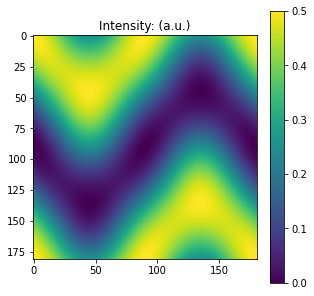


The intensity of M @ 15.00 deg * M * M * M * S is (a.u.):
The mean value is 0.25060138817301353 +- 0.15934528271477008


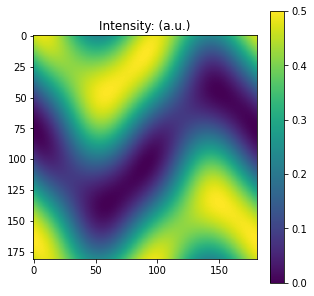


The intensity of M @ 30.00 deg * M * M * M * S is (a.u.):
The mean value is 0.2503472116235768 +- 0.14657447114674227


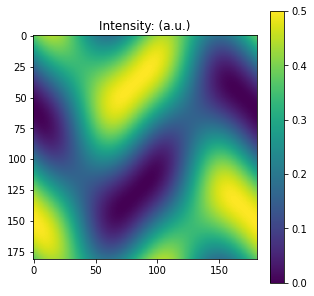


The intensity of M @ 45.00 deg * M * M * M * S is (a.u.):
The mean value is 0.25 +- 0.1397521156412159


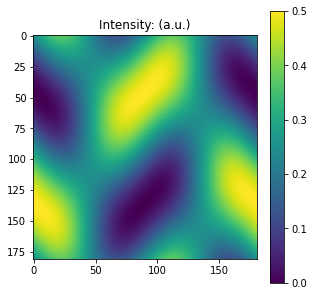

In [15]:
anglesX, anglesY = np.meshgrid(angles, angles)

S = Stokes().circular_light()
Mp1 = Mueller().diattenuator_perfect(azimuth=anglesY)
Mr1 = Mueller().quarter_waveplate(azimuth=anglesX)
Mrc = Mueller().quarter_waveplate(azimuth=0*degrees)
Mp2 = Mueller().diattenuator_perfect(azimuth=0*degrees)

Sf = Mp2 * Mr1 * Mrc * Mp1 * S
Isin = Sf.parameters.intensity(draw=True)

Mp2 = Mueller().diattenuator_perfect(azimuth=15*degrees)
Sf = Mp2 * Mr1 * Mrc * Mp1 * S
Icon = Sf.parameters.intensity(draw=True)

Mp2 = Mueller().diattenuator_perfect(azimuth=30*degrees)
Sf = Mp2 * Mr1 * Mrc * Mp1 * S
Icon = Sf.parameters.intensity(draw=True)

Mp2 = Mueller().diattenuator_perfect(azimuth=45*degrees)
Sf = Mp2 * Mr1 * Mrc * Mp1 * S
Icon = Sf.parameters.intensity(draw=True)